Machine Learning Assignment Two

Q1 : By Taking reference of the Housing Price Dataset plot each independent variable with the dependent variable and store the name of independent variable in a list which show non linear behavior

In [30]:
import numpy as np 
import pandas as pd #data manupulation
import matplotlib.pyplot as plt #Graph implementation
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [31]:
df = pd.read_csv("houseRegressionStudents.csv")

# take a look at the dataset
df.head() #show me the first five rows 

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [32]:
df.describe()  #summarize the data

,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.750000,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,729.500000,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.250000,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [33]:
df

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [34]:
#Dropping unimportant variable
df.drop(["Unnamed: 0","Id"],axis=1,inplace=True)

In [35]:
#Dropping object type columns
for i in df.columns:
    if df[i].dtypes=="object":
        df.drop(i,axis=1,inplace=True)

In [36]:
df  ##  in this dataFrame we have only numerical value

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [37]:
y =df["SalePrice"]   ### DV
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [38]:
#Dropping dependent Variable
df.drop(["SalePrice"],axis=1,inplace=True)

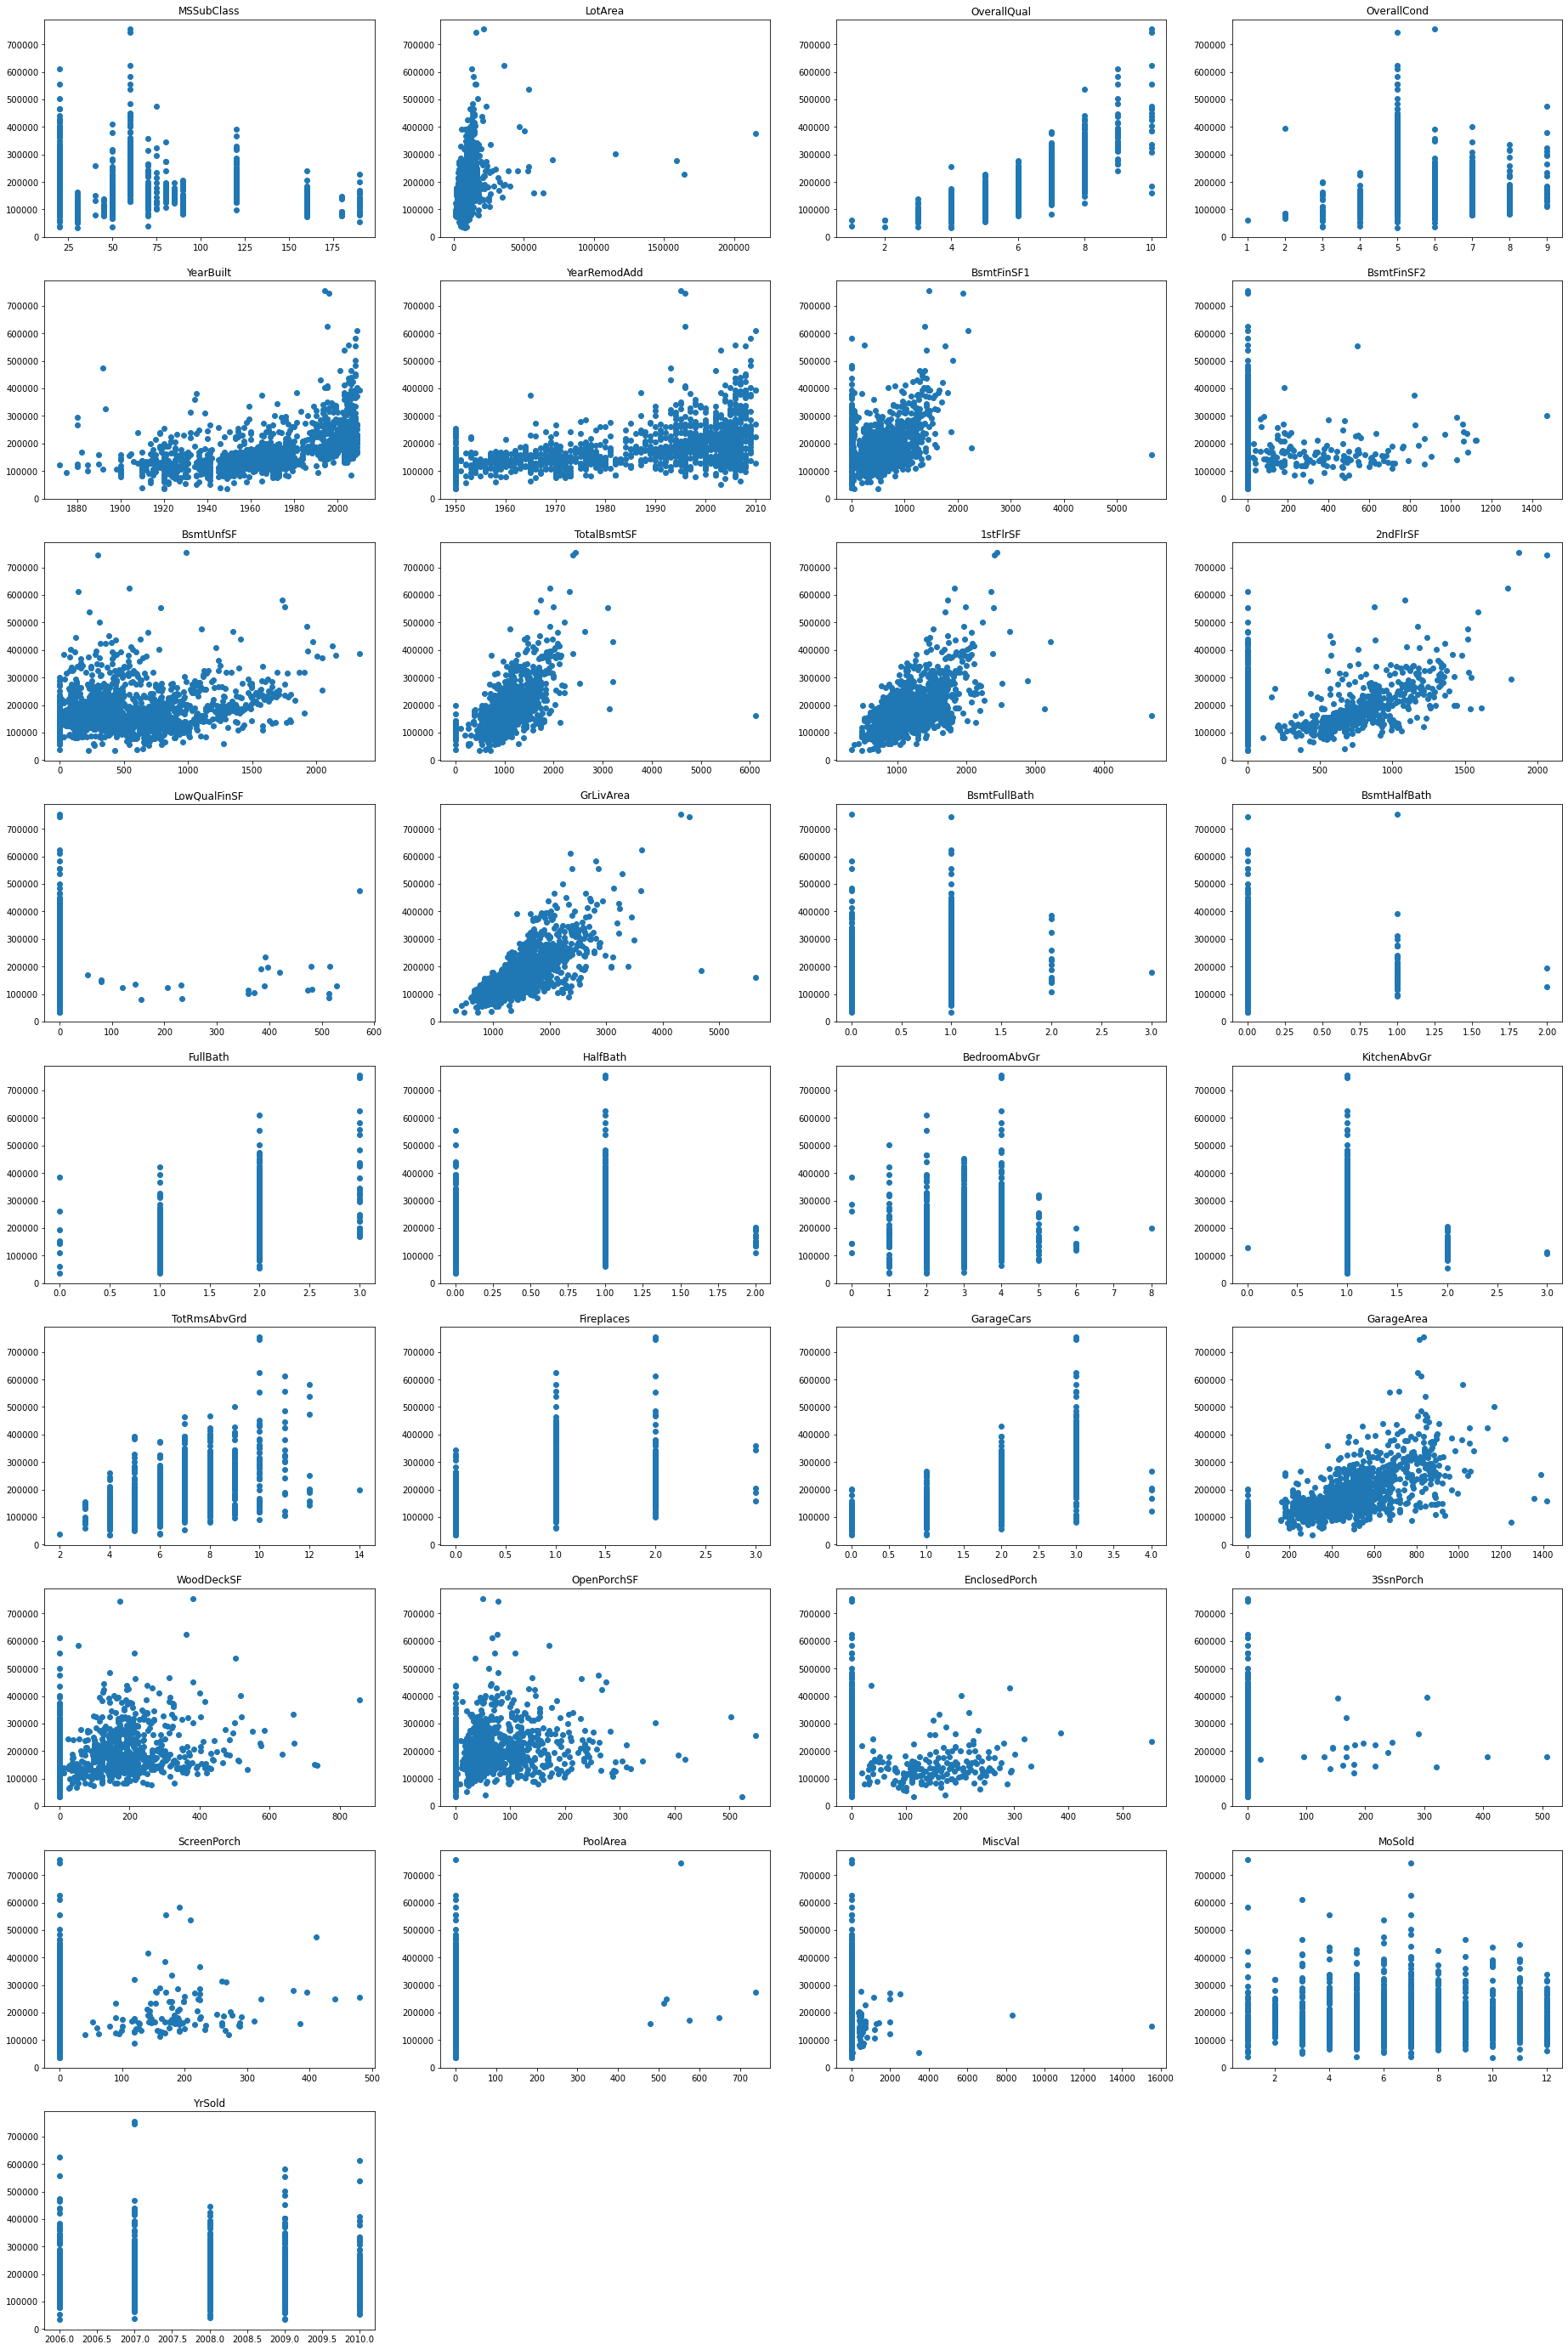

In [39]:
k=1
plt.figure(figsize=[32,50])
for i in df.columns:
    plt.subplot(9,4,k)
    plt.scatter(df[i],y)
    plt.title(i)
    k=k+1
plt.show()

In [40]:
list_of_linear_columns=["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"]

In [41]:
list_of_non_linear_columns=[x for x in df.columns if x not in list_of_linear_columns]

In [42]:
list_of_non_linear_columns

['MSSubClass',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

Q2 : Columns which showed non linear behavior apply Polynomial Linear Regression to it ... 
	Note : If there is None column which is showing Non Linear Behavior you can take anyone of the column as independent variable and apply Polynomial Linear Regression to it

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("houseRegressionStudents.csv")

# take a look at the dataset
df.head() #show me the first five rows 

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [44]:
X = df[['LotArea']] # 
X

,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1455,7917
1456,13175
1457,9042
1458,9717


In [45]:
X.values

array([[ 8450],
       [ 9600],
       [11250],
       ...,
       [ 9042],
       [ 9717],
       [ 9937]], dtype=int64)

In [46]:
Y = df['SalePrice']
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [47]:
len(X)

1460

Text(0, 0.5, 'SalePrice')

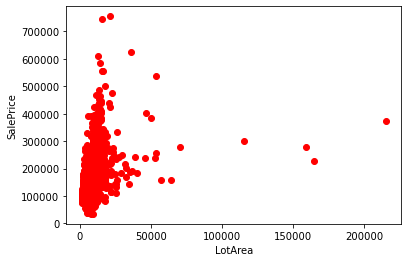

In [48]:
from matplotlib import pyplot as plt
plt.scatter(X,Y, color ="red")
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

In [49]:
from sklearn.linear_model import LinearRegression
mod_lr = LinearRegression()
mod_lr.fit(X,Y)

LinearRegression()

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 3)

In [51]:
X_poly = poly.fit_transform(X)
X_poly

array([[1.00000000e+00, 8.45000000e+03, 7.14025000e+07, 6.03351125e+11],
       [1.00000000e+00, 9.60000000e+03, 9.21600000e+07, 8.84736000e+11],
       [1.00000000e+00, 1.12500000e+04, 1.26562500e+08, 1.42382812e+12],
       ...,
       [1.00000000e+00, 9.04200000e+03, 8.17577640e+07, 7.39253702e+11],
       [1.00000000e+00, 9.71700000e+03, 9.44200890e+07, 9.17480005e+11],
       [1.00000000e+00, 9.93700000e+03, 9.87439690e+07, 9.81218820e+11]])

In [52]:
poly.fit(X_poly,Y)

PolynomialFeatures(degree=3)

Q3 : Apply multi Linear regression to the Housing Price Data Set 
	Note : you can take any number of Independent Variable 
	Note :  You need to make 3 models atleast with different number of indepent variable 
	Note : Try to get the best posible accuracy

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("houseRegressionStudents.csv")

# take a look at the dataset
df.head() #show me the first five rows 

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1460 non-null   int64 
 1   Id             1460 non-null   int64 
 2   MSSubClass     1460 non-null   int64 
 3   MSZoning       1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

In [55]:
df.shape

(1460, 63)

In [56]:
df.isnull().sum()

Unnamed: 0       0
Id               0
MSSubClass       0
MSZoning         0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 63, dtype: int64

In [57]:
df.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [58]:
X = df[['LotArea', 'YearBuilt', 'GrLivArea', 'GarageArea']]# 
X

,LotArea,YearBuilt,GrLivArea,GarageArea
0,8450,2003,1710,548
1,9600,1976,1262,460
2,11250,2001,1786,608
3,9550,1915,1717,642
4,14260,2000,2198,836
...,...,...,...,...
1455,7917,1999,1647,460
1456,13175,1978,2073,500
1457,9042,1941,2340,252
1458,9717,1950,1078,240


In [59]:
X.values

array([[ 8450,  2003,  1710,   548],
       [ 9600,  1976,  1262,   460],
       [11250,  2001,  1786,   608],
       ...,
       [ 9042,  1941,  2340,   252],
       [ 9717,  1950,  1078,   240],
       [ 9937,  1965,  1256,   276]], dtype=int64)

In [60]:
y = df['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [61]:
y = df['SalePrice'].values
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50) # % 1

X_train

,LotArea,YearBuilt,GrLivArea,GarageArea
727,7314,2007,1232,632
29,6324,1927,520,240
1295,8400,1968,1052,288
1437,12444,2008,1932,774
396,7200,1972,894,600
...,...,...,...,...
229,3182,2005,1555,430
70,13651,1973,2223,516
132,7388,1959,1327,624
1313,14774,1999,2599,779


In [63]:
X_train.shape

(1168, 4)

In [64]:
X_test

,LotArea,YearBuilt,GrLivArea,GarageArea
930,8925,2007,1466,610
530,10200,1988,1509,600
1291,1680,1972,1302,264
1385,5436,1922,1154,240
305,10386,2004,2000,888
...,...,...,...,...
453,9000,2008,1590,676
678,11844,2008,2046,834
190,10570,1932,2727,440
748,10593,1996,1720,527


In [65]:
y_test[:5]

array([201000, 175000, 119500, 125500, 305900], dtype=int64)

In [66]:
from sklearn.linear_model import LinearRegression
model_mlr = LinearRegression()
model_mlr.fit(X_train, y_train)

LinearRegression()

In [67]:
model_mlr.predict(X_test)[:5]

array([216852.10085539, 204109.07827516, 143844.88242331,  90764.05816646,
       277382.18660575])

In [68]:
model_mlr.score(X_test, y_test) ## our model give us 73%  accuracy

0.7301243861044229

Q4 : We are providing you churn dataset and we expect you to apply logistic regression on it and try to change the hyperparameters so that you can get the best possible acuracy

In [69]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt

In [70]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [71]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0


In [72]:
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [73]:
churn_df.shape

(200, 10)

In [74]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

In [75]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 15.0 KB


In [76]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]) #independent variable

In [77]:
X[:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [78]:
y = np.asarray(churn_df['churn']) #dependent variable
y[:5]

array([1, 1, 0, 0, 0])

In [79]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [80]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=200) #trainingsize = 70% test = 30%

In [81]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [82]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='saga')
LR.fit(X_train,y_train) #training 
LR

LogisticRegression(solver='saga')

In [83]:
yhat = LR.predict(X_test)#only questions passed and answers are saved for evaluation
yhat[:5]

array([1, 0, 0, 0, 0])

In [84]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.25587869, 0.74412131],
       [0.79839885, 0.20160115],
       [0.97098865, 0.02901135],
       [0.96105125, 0.03894875],
       [0.78134565, 0.21865435]])

In [85]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat) #actualvale,predvalue

0.75

In [86]:
X_test[:,1] #1 index col values .

array([-1.00927084,  0.3706665 ,  1.4439511 ,  2.59389889, -1.31592358,
        0.83064562, -1.46924996,  2.59389889,  1.59727748,  1.06063518,
        0.3706665 , -0.85594447, -0.7026181 ,  0.52399288,  0.29400332,
       -1.16259721,  0.67731925,  0.83064562, -1.08593403, -1.31592358,
       -0.47262854,  1.06063518, -0.54929173, -0.93260766, -1.46924996,
       -1.2392604 , -0.93260766, -0.85594447, -0.54929173, -0.62595491,
        1.21396155,  0.14067695,  0.06401376,  2.67056208, -0.08931261,
        0.44732969,  1.52061429, -1.08593403, -0.01264943,  0.29400332])

In [87]:
X_test[:,-2] #2nd last colunm values 

array([-1.03245566,  0.31057609,  1.87744647, -0.4728591 , -0.69669772,
        1.98936579, -1.14437497,  3.78007479, -0.69669772,  1.2059306 ,
        0.98209197, -0.80861704, -0.58477841,  0.98209197,  1.2059306 ,
       -1.14437497, -0.24902047,  1.54168853, -0.92053635, -1.14437497,
       -0.13710116,  1.65360785,  0.42249541, -0.58477841, -1.14437497,
       -0.92053635,  0.31057609, -0.36093978, -0.02518185, -0.36093978,
       -0.36093978,  0.87017266, -0.24902047,  0.87017266,  0.19865678,
       -0.02518185, -0.24902047, -1.03245566, -0.80861704,  0.75825334])

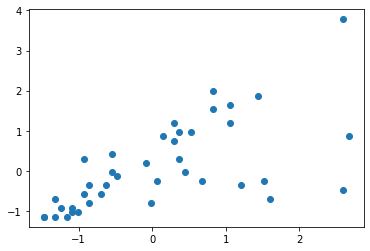

In [88]:
plt.scatter(X_test[:,1],X_test[:,-2])

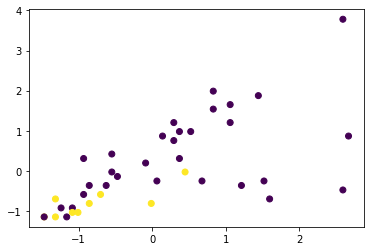

In [89]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,1],X_test[:,-2],c = y_test) #coloring based on actual values 

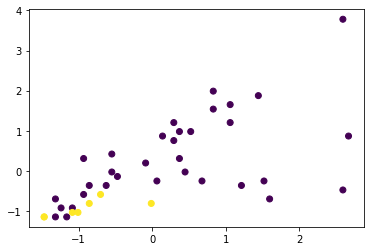

In [90]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,1],X_test[:,-2],c = yhat) # coloring based on predict values 

Q5 : We are providing you the cell dataset and we expect you to use all the independent variables for creating the SVM machine learning model and change the hyperparameters so that you can get the best accuracy

In [91]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [92]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [93]:
cell_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [94]:
cell_df.info() # check the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [95]:
cell_df.drop('BareNuc',axis = 1,inplace = True) #remove the BareNuc column name 

In [96]:
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,2
696,888820,5,10,10,3,7,8,10,2,4
697,897471,4,8,6,4,3,10,6,1,4


In [97]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BlandChrom', 'NormNucl', 'Mit']]
feature_df #iv

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1
...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,1,1,1
695,2,1,1,1,2,1,1,1
696,5,10,10,3,7,8,10,2
697,4,8,6,4,3,10,6,1


In [98]:
feature_df.dtypes

Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BlandChrom     int64
NormNucl       int64
Mit            int64
dtype: object

In [99]:
X = np.asarray(feature_df) #independet variable independent variable array got created
X[:5]#show me elements from zeroth row to 5th row

array([[5, 1, 1, 1, 2, 3, 1, 1],
       [5, 4, 4, 5, 7, 3, 2, 1],
       [3, 1, 1, 1, 2, 3, 1, 1],
       [6, 8, 8, 1, 3, 3, 7, 1],
       [4, 1, 1, 3, 2, 3, 1, 1]], dtype=int64)

In [100]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class']) #dependent variable
y [:5]

array([2, 2, 2, 2, 2])

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (489, 8) (489,)
Test set: (210, 8) (210,)


In [102]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train) # question and answers

SVC()

In [103]:
yhat_best_prediction = svm_model.predict(X_test) #question 
yhat_best_prediction [0:5]# After being fitted, the model can then be used to predict new values:

array([2, 2, 2, 4, 2])

In [104]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_best_prediction, average='weighted') 

0.9621130748950298

In [105]:
svm_model1 = svm.SVC(kernel='poly')
svm_model1.fit(X_train, y_train) 
yhat2 = svm_model1.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average="weighted"))


Avg F1-score: 0.9380


In [106]:
svm_model2 = svm.SVC(kernel='linear')
svm_model2.fit(X_train, y_train) 
yhat2 = svm_model2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average="weighted"))


Avg F1-score: 0.9525


In [107]:
svm_model3 = svm.SVC(kernel='sigmoid')
svm_model3.fit(X_train, y_train) 
yhat2 = svm_model3.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average="weighted"))

Avg F1-score: 0.4504


Q6 :  Take the same cell Dataset and instead of SVM apply logistic regression in it..?

In [108]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [110]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [112]:
df.drop('BareNuc',axis = 1,inplace = True)

In [113]:
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,2
696,888820,5,10,10,3,7,8,10,2,4
697,897471,4,8,6,4,3,10,6,1,4


In [114]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [115]:
X = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BlandChrom', 'NormNucl', 'Mit']]
X #iv


,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1
...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,1,1,1
695,2,1,1,1,2,1,1,1
696,5,10,10,3,7,8,10,2
697,4,8,6,4,3,10,6,1


In [116]:
X.dtypes

Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BlandChrom     int64
NormNucl       int64
Mit            int64
dtype: object

In [117]:
X.values[:5] #independet variable independent variable array got created

array([[5, 1, 1, 1, 2, 3, 1, 1],
       [5, 4, 4, 5, 7, 3, 2, 1],
       [3, 1, 1, 1, 2, 3, 1, 1],
       [6, 8, 8, 1, 3, 3, 7, 1],
       [4, 1, 1, 3, 2, 3, 1, 1]], dtype=int64)

In [118]:
y = cell_df['Class']

In [119]:
y # DV

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int32

In [120]:
y.dtypes

dtype('int32')

In [121]:
y.values[:5]

array([2, 2, 2, 2, 2])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (489, 8) (489,)
Test set: (210, 8) (210,)


In [123]:
from sklearn import svm
Mod = svm.SVC(kernel='rbf') # Radial basis function (RBF)
Mod .fit(X_train, y_train) # question and answers train the model

SVC()

In [124]:
y_best_prediction = Mod.predict(X_test) #question 
y_best_prediction[:5]

array([2, 2, 2, 4, 2])

In [125]:
from sklearn.metrics import f1_score

In [126]:
f1_score(y_test, y_best_prediction, average = 'weighted') # by using RBF kernal our model gives us 96.21 % accuracy

0.9621130748950298

Q7 : we are providing you a dataset apart from churn and cell dataset which is titanic dataset remove unnecessary column which are not usefull  with aspect of machine learning and apply label encoding where ever its necessary and store processed data into your memory

	NOTE : Survived is the dependent Column

In [127]:
import numpy as np 
import pandas as pd

df = pd.read_csv("titanic_data.csv")

In [128]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [130]:
set(df.Sex)

{'female', 'male'}

In [131]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [132]:
df1 = df.dropna() #dropna will remove all the rows containing null values 

In [133]:
df1.head(3)             ## which gives us 183 rows × 12 columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [134]:
df1.shape

(183, 12)

In [135]:
df.shape

(891, 12)

In [136]:
df2 = df.drop('Cabin',axis=1) # #cabin col is having more than 70% of data as null value therefore it should be removed

In [137]:
df2.head(2)  #  which gives us 891 rows × 11 columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [138]:
df2.shape

(891, 11)

In [139]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [140]:
df2 = df2.dropna()

In [141]:
df2 ## which gives us (712, 11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [142]:
df2.shape

(712, 11)

In [143]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [144]:
set(df2.Embarked)

{'C', 'Q', 'S'}

In [145]:
set(df2.Sex)

{'female', 'male'}

In [146]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder
le = LabelEncoder()

In [147]:
df2.le = df2 ## where we apply LE
df2['Embarked'] = le.fit_transform(df2['Embarked'])

In [148]:
df2.Embarked

0      2
1      0
2      2
3      2
4      2
      ..
885    1
886    2
887    2
889    0
890    1
Name: Embarked, Length: 712, dtype: int32

In [149]:
set(df2.Embarked) ## here label encoding is applied {0, 1, 2} instate of {'C', 'Q', 'S'}

{0, 1, 2}

In [150]:
df2['Sex'] = le.fit_transform(df2['Sex']) ## here label encoding is applied {0, 1,} instate of {''female', 'male'}

In [151]:
df2.Sex

0      1
1      0
2      0
3      0
4      1
      ..
885    0
886    1
887    0
889    1
890    1
Name: Sex, Length: 712, dtype: int32

In [152]:
set(df2.Sex)

{0, 1}

In [153]:
df2 # check now we have applied label encoding to the Sex and Embarked column update dataframe mean the data is now processed 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,1
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


Q8 : Use that processed titanic dataset and apply svm in it 

          NOTE : Survived is the dependent Column

In [154]:
X = df2[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']].values #independent variable 
X[0:5]

array([[ 1.    ,  3.    ,  1.    , 22.    ,  1.    ,  7.25  ,  2.    ],
       [ 2.    ,  1.    ,  0.    , 38.    ,  1.    , 71.2833,  0.    ],
       [ 3.    ,  3.    ,  0.    , 26.    ,  0.    ,  7.925 ,  2.    ],
       [ 4.    ,  1.    ,  0.    , 35.    ,  1.    , 53.1   ,  2.    ],
       [ 5.    ,  3.    ,  1.    , 35.    ,  0.    ,  8.05  ,  2.    ]])

In [155]:
y = df2['Survived'].values #DEPENDENT VARIABLE
y[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [156]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (569, 7) (569,)
Test set: (143, 7) (143,)


In [158]:
from sklearn import svm # import SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) # question and answers

SVC(kernel='linear')

In [159]:
# After being fitted, the model can then be used to predict new values:
y_prediction = clf.predict(X_test) #question 
y_prediction [0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [160]:
from sklearn.metrics import f1_score # our model gives us 80 % 
f1_score(y_test, y_prediction, average='weighted') 

0.8028607755880484